In [2]:
%run main.py --config config/libri/asr_example.yaml

ModuleNotFoundError: No module named 'ASR'

In [1]:
import torch

torch.cuda.current_device()

0

In [2]:
torch.cuda.device_count()



1

In [3]:
torch.cuda.get_device_name(0)

'GeForce GTX 1060 6GB'

In [4]:
torch.cuda.is_available()

True

In [41]:
import yaml
import torch
import argparse
import numpy as np
from nlpaug.util.audio.loader import AudioLoader
from nlpaug.util.audio.visualizer import AudioVisualizer
import nlpaug.augmenter.spectrogram as nas
import nlpaug.flow as naf

# For reproducibility, comment these may speed up training
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

parser = argparse.ArgumentParser(description='Training E2E asr.')
paras = parser
# Arguments
paras.gpu = True
paras.pin_memory = True
paras.config = 'config/libri/asr_example.yaml'
config = yaml.load(open(paras.config, 'r'), Loader=yaml.FullLoader)
paras.seed = 0 
paras.amp = True
paras.name = None
paras.ckpdir = 'ckpt/'
paras.logdir = 'log/'
paras.verbose = True
paras.njobs = 6


np.random.seed(paras.seed)
torch.manual_seed(paras.seed)

if torch.cuda.is_available():
    torch.cuda.manual_seed_all(paras.seed)

from bin.train_asr import Solver
mode = 'train'

solver = Solver(config, paras, mode)
solver.load_data()
data = iter(solver.tr_set).next() 
file, feat, feat_len, txt = data

#solver.set_model()
#solver.exec()

[INFO] Exp. name : asr_example_sd0                                                                         
[INFO] Loading data... large corpus may took a while.                                                      
[INFO] Data spec. | Corpus = Librispeech (from data/LibriSpeech)                                           
[INFO]            | Train sets = ['train-clean-100 (copy)']	| Number of utts = 455                         
[INFO]            | Dev sets = ['dev-clean']	| Number of utts = 2703                                       
[INFO]            | Batch size = 16		| Bucketing = True                                                    
[INFO] I/O spec.  | Audio feature = fbank	| feature dim = 80	| Token type = subword	| Vocab size = 16000   


In [42]:
np.shape(feat)

torch.Size([16, 620, 80])

In [43]:
file[1]

'6529-62554-0030'

In [44]:
feat[1].size()

torch.Size([620, 80])

In [21]:
for f in feat:
    print(f)

tensor([[ -7.3681,  -5.5121,  -9.3896,  ..., -15.7744, -15.2672, -18.1242],
        [ -7.1124,  -5.2563,  -8.2434,  ..., -16.4559, -17.3612, -18.1463],
        [ -7.3678,  -5.5117,  -6.4587,  ..., -13.5287, -14.5302, -14.5889],
        ...,
        [ -6.4823,  -4.6262, -10.8019,  ..., -15.0221, -15.9148, -16.0530],
        [ -8.0130,  -6.1570,  -9.4684,  ..., -12.8548, -13.8791, -13.2634],
        [ -9.2903,  -7.4343,  -8.8810,  ..., -14.7055, -14.7419, -16.2699]])
tensor([[-17.8079, -15.9519, -18.3061,  ..., -22.1109, -20.9888, -21.4703],
        [-17.9880, -16.1320, -17.8189,  ..., -20.9556, -20.0234, -19.8029],
        [-18.0478, -16.1918, -17.3232,  ..., -20.5965, -21.1966, -21.3708],
        ...,
        [  0.0000,   0.0000,   0.0000,  ...,   0.0000,   0.0000,   0.0000],
        [  0.0000,   0.0000,   0.0000,  ...,   0.0000,   0.0000,   0.0000],
        [  0.0000,   0.0000,   0.0000,  ...,   0.0000,   0.0000,   0.0000]])
tensor([[ -9.5866,  -7.7306,  -7.1707,  ..., -10.3622, -10.4

In [24]:
feat[0] = feat[1]

In [27]:
feat[2] 

tensor([[ -9.5866,  -7.7306,  -7.1707,  ..., -10.3622, -10.4124, -12.7008],
        [-10.4257,  -8.5696,  -8.3703,  ..., -13.2263, -13.8119, -13.8238],
        [ -7.6338,  -5.7778,  -6.9815,  ..., -12.9195, -13.9411, -12.4552],
        ...,
        [  0.0000,   0.0000,   0.0000,  ...,   0.0000,   0.0000,   0.0000],
        [  0.0000,   0.0000,   0.0000,  ...,   0.0000,   0.0000,   0.0000],
        [  0.0000,   0.0000,   0.0000,  ...,   0.0000,   0.0000,   0.0000]])

In [1]:
%matplotlib inline
import torch
import torchaudio
import matplotlib.pyplot as plt

/home/zwan074/anaconda3/lib/python3.8/site-packages/torchaudio/backend/utils.py:53: UserWarning: "sox" backend is being deprecated. The default backend will be changed to "sox_io" backend in 0.8.0 and "sox" backend will be removed in 0.9.0. Please migrate to "sox_io" backend. Please refer to https://github.com/pytorch/audio/issues/903 for the detail.
  warnings.warn(


Shape of waveform: torch.Size([1, 239280])
Sample rate of waveform: 16000


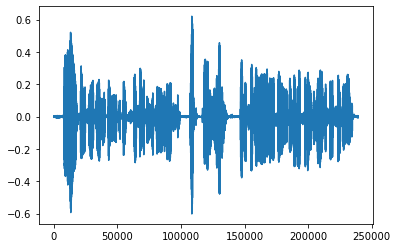

In [2]:
filename = '7447-91187-0011.flac'
waveform, sample_rate = torchaudio.load(filename)

print("Shape of waveform: {}".format(waveform.size()))
print("Sample rate of waveform: {}".format(sample_rate))

plt.figure()
plt.plot(waveform.t().numpy())

Shape of spectrogram: torch.Size([1, 201, 1197])


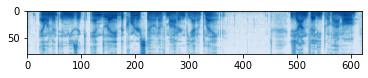

In [19]:
specgram = torchaudio.transforms.Spectrogram()(waveform)

print("Shape of spectrogram: {}".format(specgram.size()))

plt.figure()
plt.imshow(feat[0].t(), cmap='Blues')

Shape of spectrogram: torch.Size([1, 80, 1197])


torch.Size([1, 80, 1197])

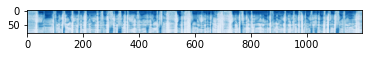

In [9]:
specgram = torchaudio.transforms.MelSpectrogram(n_mels = 80)(waveform)

print("Shape of spectrogram: {}".format(specgram.size()))

plt.figure()
p = plt.imshow(specgram.log2()[0,:,:].detach().numpy(), cmap='Blues')
specgram.log2().detach().size()

In [16]:
specgram[0,:,:]

tensor([[0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [9.8783e-04, 2.3963e-03, 4.5271e-04,  ..., 1.4124e-03, 6.7655e-04,
         5.3297e-03],
        [5.3187e-03, 1.2902e-02, 2.4375e-03,  ..., 7.6047e-03, 3.6428e-03,
         2.8697e-02],
        ...,
        [9.3657e-06, 1.4918e-05, 1.4493e-05,  ..., 1.0234e-04, 1.4243e-04,
         4.2927e-04],
        [2.9831e-06, 1.2110e-05, 2.8373e-05,  ..., 5.2736e-05, 3.2527e-04,
         3.1264e-04],
        [1.0164e-05, 1.8171e-05, 1.5355e-05,  ..., 6.8845e-05, 1.1245e-04,
         1.5019e-04]])

Shape of spectrogram: torch.Size([1195, 201])


torch.Size([1, 201, 1195])

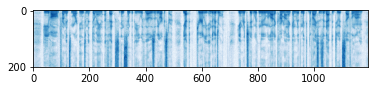

In [14]:
n_fft = 400.0
frame_length = n_fft / sample_rate * 1000.0
frame_shift = frame_length / 2.0

params = {
    "channel": 0,
    "dither": 0.0,
    "window_type": "hanning",
    "frame_length": frame_length,
    "frame_shift": frame_shift,
    "remove_dc_offset": False,
    "round_to_power_of_two": False,
    "sample_frequency": sample_rate,
}

specgram = torchaudio.compliance.kaldi.spectrogram(waveform, **params)

print("Shape of spectrogram: {}".format(specgram.size()))

plt.figure()
plt.imshow(specgram.t(), cmap='Blues')
specgram.transpose(0, 1).unsqueeze(0).detach().size()

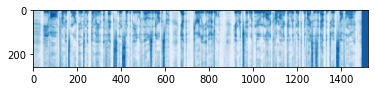

In [8]:
plt.figure()
plt.imshow(feat[1].t(), cmap='Blues')

Shape of fbank: torch.Size([1195, 23])


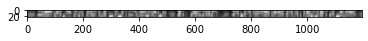

In [10]:
fbank = torchaudio.compliance.kaldi.fbank(waveform, **params)

print("Shape of fbank: {}".format(fbank.size()))

plt.figure()
plt.imshow(fbank.t().numpy(), cmap='gray')


Shape of mfcc: torch.Size([249, 13])


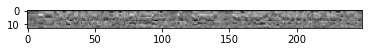

In [26]:
mfcc = torchaudio.compliance.kaldi.mfcc(waveform, **params)

print("Shape of mfcc: {}".format(mfcc.size()))

plt.figure()
plt.imshow(mfcc.t().numpy(), cmap='gray')


In [4]:
from src.augment import *

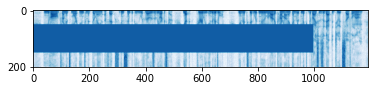

In [47]:
plt.figure()
plt.imshow(specgram.t(), cmap='Blues')

In [52]:
specgram.size()[1]

201

In [45]:
import torch
import torchaudio
import matplotlib.pyplot as plt
import numpy as np

def cut_out(image, size):
    
    x = int(np.random.uniform(low=0.0, high= image.size()[0]))
    y = int(np.random.uniform(low=0.0, high= image.size()[1]))
    
    x_plus = int(np.random.uniform(low=0.0, high= size))
    y_plus = int(np.random.uniform(low=0.0, high= size))

    #img = image.clone().detach()
    image[x:x + x_plus, y:y + y_plus] = 0
    return image


def gauss_noise(image, sigma_sq):
    h, w = image.shape
    gauss = np.random.normal(0, sigma_sq, (h, w))
    gauss = gauss.reshape(h, w)
    image = image + gauss
    return image

In [159]:
img = gauss_noise(specgram.t(), 5)

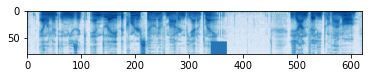

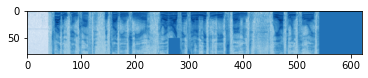

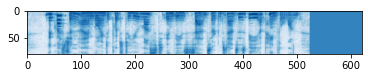

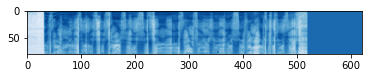

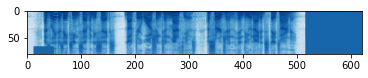

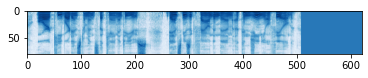

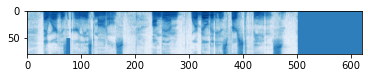

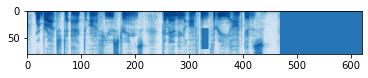

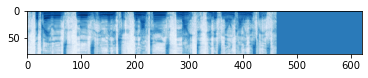

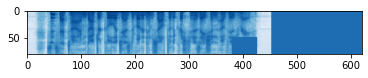

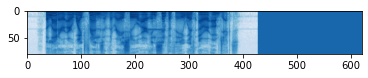

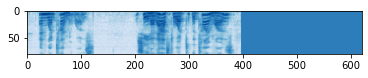

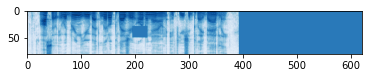

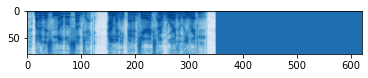

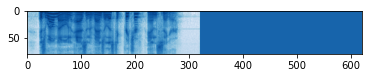

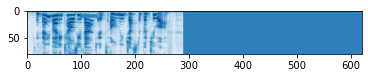

In [46]:
for i in range(len(feat)):
    feat[i] = cut_out(feat[i], 50)
    plt.figure()
    plt.imshow(feat[i].t(), cmap='Blues')

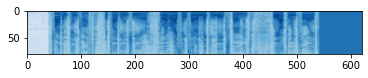

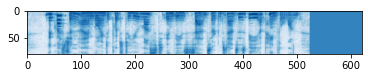

In [37]:
plt.figure()
plt.imshow(feat[1].t(), cmap='Blues')
plt.figure()
plt.imshow(feat[2].t(), cmap='Blues')

In [40]:
img = cut_out(img, 200)

NameError: name 'img' is not defined

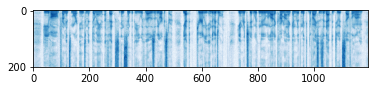

In [162]:
plt.figure()
plt.imshow(specgram.t(), cmap='Blues')